<a href="https://colab.research.google.com/github/melina-ze/proyecto-turismo/blob/main/ProyectoParteIII%2BZeitunlian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Microdatos Turismo

El presente trabajo tiene como objetivo explorar y analizar el comportamiento turístico en Argentina a partir del dataset “Microdatos Turismo”, el cual contiene información detallada de encuestas realizadas a hogares sobre viajes y características socioeconómicas. El análisis se centra en identificar patrones de viaje, tipos de alojamiento, niveles de gasto, y posibles correlaciones con variables demográficas como el ingreso del hogar y la duración del viaje.

El dataset cuenta con más de 500.000 registros y más de 50 variables, aunque muchas presentan valores faltantes. Se ha realizado una limpieza previa conservando aquellas columnas que contienen información relevante y con un porcentaje de completitud aceptable para garantizar la validez de los análisis. A partir de esto, se construyen visualizaciones univariadas, bivariadas y multivariadas que permiten comprender la distribución y las relaciones entre variables clave.

Entre los principales focos del estudio se encuentran: el gasto total según el tipo de alojamiento, la relación entre el ingreso del hogar y la duración del viaje, y la distribución geográfica del turismo a través de códigos departamentales y provinciales. Se busca responder si existen diferencias significativas en el comportamiento de los viajeros en función del nivel socioeconómico, tipo de destino, o época del año.

Los resultados obtenidos permiten generar hipótesis sobre los factores que influyen en el turismo nacional, lo cual puede resultar útil tanto para organismos públicos como privados al momento de desarrollar políticas turísticas o segmentar servicios.

1. ¿Existe una relación entre el ingreso del hogar y el gasto total en turismo?
*Hipótesis:* A mayor ingreso, mayor gasto promedio en los viajes.
2. ¿Qué tipo de alojamiento genera un mayor gasto total?
*Hipótesis:* Los alojamientos pagos (hoteles, cabañas) tienen un gasto mayor que los no pagos (casa de familiares).
3. ¿Hay diferencias en la duración del viaje según el nivel de ingreso o tipo de alojamiento?
*Hipótesis:* Los hogares con mayor ingreso o que eligen alojamiento pago tienden a realizar viajes más largos.
4. ¿Cuáles son las provincias con mayor volumen de turistas?
*Hipótesis:* Las regiones turísticas tradicionales como Buenos Aires, Córdoba y Mendoza concentran mayor cantidad de viajes.
5. ¿Se observan patrones estacionales en los viajes (por mes o trimestre)?
*Hipótesis:* La mayor cantidad de viajes se concentra en el verano y vacaciones de invierno.

In [45]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
file_path = '/content/drive/MyDrive/Microdatos Turismo.csv'

df = pd.read_csv(file_path)
df.head()

,id_hogar,id_viajes,miembro,anio,trimestre,region_origen,aglomerado_origen,region_destino,provincia_destino,localidad_destino,...,p006,p006_agrup,p007,nivel_ed,cond_act,p013,j_sexo,j_edad,j_nivel_ed,j_cond_act
0,71,41201,1,2012,1,2,33,3,6,Mar del Tuyú,...,54,4,2.0,7,1,2,1,3,4,1
1,71,41201,2,2012,1,2,33,3,6,Mar del Tuyú,...,56,4,2.0,4,1,3,1,3,4,1
2,71,41201,3,2012,1,2,33,3,6,Mar del Tuyú,...,23,2,1.0,8,1,2,1,3,4,1
3,71,41201,4,2012,1,2,33,3,6,Mar del Tuyú,...,27,2,2.0,9,1,3,1,3,4,1
4,71,61201,3,2012,1,2,33,3,6,Reta ...,...,23,2,1.0,8,1,2,1,3,4,1


In [47]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])
print("\nColumnas:")
print(df.columns.tolist())

Filas: 490904
Columnas: 88

Columnas:
['id_hogar', 'id_viajes', 'miembro', 'anio', 'trimestre', 'region_origen', 'aglomerado_origen', 'region_destino', 'provincia_destino', 'localidad_destino', 'cod_loc_2001', 'codigo_2001', 'codigo_2010', 'cod_prov_2010', 'cod_depto_2010', 'cod_loc_2010', 'pondera', 'tipo_visitante', 'cantidad_destinos', 'multidestino', 'px06', 'px06_agrup', 'px07', 'px07_agrup', 'px08', 'px08_agrup', 'px09', 'px10_1', 'px11', 'px12_1', 'px12_2', 'px12_3', 'px12_4', 'px12_5', 'px12_6', 'px12_7', 'px12_8', 'px13', 'px14', 'px15_1', 'px15_2', 'px15_3', 'px15_4', 'pxb16_1_1', 'pxb16_1_2', 'pxb16_1_3', 'pxb16_1_4', 'pxb16_1_5', 'pxb16_1_6', 'pxb16_1_7', 'pxb16_1_9', 'pxb16_2', 'px17_1', 'px17_2_1', 'px17_2_2', 'px17_2_3', 'px17_2_4', 'px17_2_5', 'px17_2_6', 'px17_2_7', 'px17_2_8', 'px17_2_9', 'px17_2_10', 'px17_2_11', 'px17_2_12', 'px17_2_13', 'px18_1', 'px18_2', 'px18_3', 'px18_4', 'px18_5', 'px18_6', 'px18_7', 'gasto_pc', 'quintil_pcf_visitante', 'p002', 'p004', 'p005',

In [48]:
valores_nulos = df.isnull().sum()
valores_nulos[valores_nulos > 0]

,0
codigo_2001,17276
codigo_2010,21785
cod_prov_2010,17294
cod_depto_2010,21783
cod_loc_2010,39207
px07_agrup,248837
px11,303516
px12_1,303530
px12_2,303530
px12_3,303530


In [49]:
valores_nulos = df.isnull().sum()
valores_nulos_pct = (valores_nulos / len(df)) * 100
print(pd.concat([valores_nulos, valores_nulos_pct], axis=1, keys=['Nulos', '% del total']))

            Nulos  % del total
id_hogar        0          0.0
id_viajes       0          0.0
miembro         0          0.0
anio            0          0.0
trimestre       0          0.0
...           ...          ...
p013            0          0.0
j_sexo          0          0.0
j_edad          0          0.0
j_nivel_ed      0          0.0
j_cond_act      0          0.0

[88 rows x 2 columns]


In [50]:
columnas_necesarias = [
    'px07_agrup', 'gasto_pc', 'px15_1',
    'px06_agrup', 'j_edad', 'p006_agrup', 'nivel_ed'
]
df_limpio = df.dropna(subset=columnas_necesarias)
print(f'Filas antes: {len(df)}')
print(f'Filas después de eliminar nulos en columnas clave: {len(df_limpio)}')

Filas antes: 490904
Filas después de eliminar nulos en columnas clave: 96767


In [51]:
print(df.columns.tolist())

['id_hogar', 'id_viajes', 'miembro', 'anio', 'trimestre', 'region_origen', 'aglomerado_origen', 'region_destino', 'provincia_destino', 'localidad_destino', 'cod_loc_2001', 'codigo_2001', 'codigo_2010', 'cod_prov_2010', 'cod_depto_2010', 'cod_loc_2010', 'pondera', 'tipo_visitante', 'cantidad_destinos', 'multidestino', 'px06', 'px06_agrup', 'px07', 'px07_agrup', 'px08', 'px08_agrup', 'px09', 'px10_1', 'px11', 'px12_1', 'px12_2', 'px12_3', 'px12_4', 'px12_5', 'px12_6', 'px12_7', 'px12_8', 'px13', 'px14', 'px15_1', 'px15_2', 'px15_3', 'px15_4', 'pxb16_1_1', 'pxb16_1_2', 'pxb16_1_3', 'pxb16_1_4', 'pxb16_1_5', 'pxb16_1_6', 'pxb16_1_7', 'pxb16_1_9', 'pxb16_2', 'px17_1', 'px17_2_1', 'px17_2_2', 'px17_2_3', 'px17_2_4', 'px17_2_5', 'px17_2_6', 'px17_2_7', 'px17_2_8', 'px17_2_9', 'px17_2_10', 'px17_2_11', 'px17_2_12', 'px17_2_13', 'px18_1', 'px18_2', 'px18_3', 'px18_4', 'px18_5', 'px18_6', 'px18_7', 'gasto_pc', 'quintil_pcf_visitante', 'p002', 'p004', 'p005', 'p006', 'p006_agrup', 'p007', 'nivel_

In [52]:
df['j_edad'].unique()


array([3, 2, 4, 1, 0])

In [53]:
df.columns[df.columns.str.contains("edad", case=False)]


Index(['j_edad'], dtype='object')

In [54]:
df['grupo_etario'] = df['j_edad']

In [55]:
df['grupo_etario'] = df['grupo_etario'].replace({
    0: '≤14',
    1: '15–29',
    2: '30–44',
    3: '45–59',
    4: '≥60'
})

In [56]:
df['grupo_etario'].unique()

array(['45–59', '30–44', '≥60', '15–29', '≤14'], dtype=object)

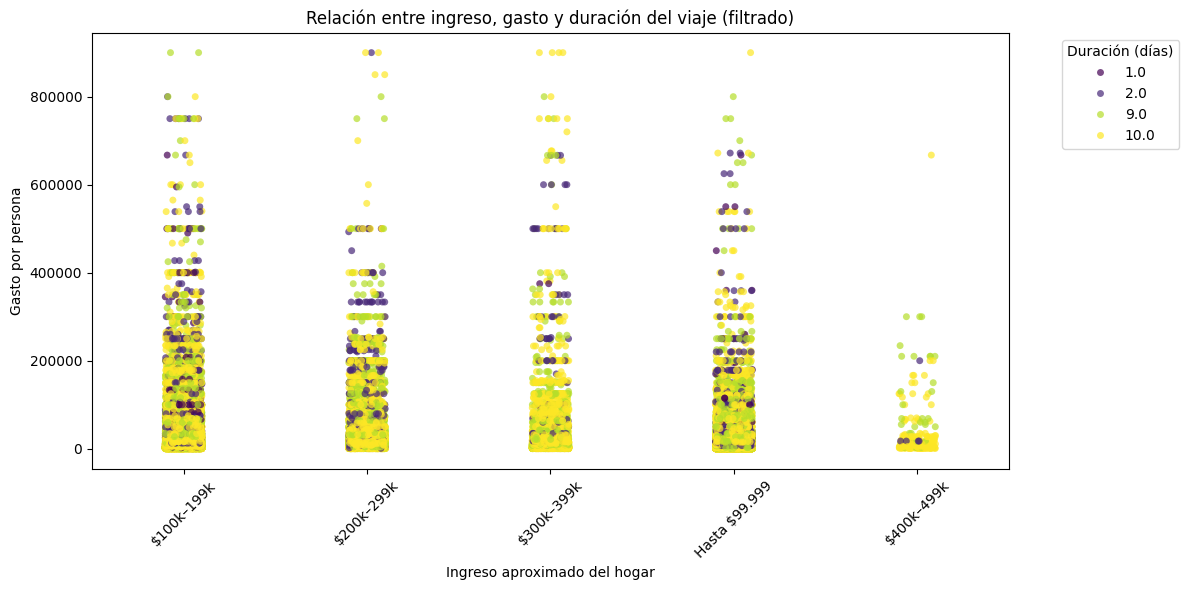

In [57]:
ingreso_labels = {
    1: 'Hasta $99.999',
    2: '$100k–199k',
    3: '$200k–299k',
    4: '$300k–399k',
    5: '$400k–499k',
    6: 'Más de $500k'
}
df['ingreso_cat'] = df['px07_agrup'].map(ingreso_labels)
df_filtrado = df[df['gasto_pc'] < 1_000_000]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_filtrado, x='ingreso_cat', y='gasto_pc', hue='px15_1', palette='viridis', jitter=True, alpha=0.7)
plt.title('Relación entre ingreso, gasto y duración del viaje (filtrado)')
plt.xlabel('Ingreso aproximado del hogar')
plt.ylabel('Gasto por persona')
plt.legend(title='Duración (días)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Gráfico 1: Gastos por Persona
Este gráfico muestra que los hogares con ingresos mayores tienden a gastar más por persona en sus viajes.
Se observa además que los viajes más largos (duración en color) suelen tener gastos más altos.
Filtrar los gastos extremos permitió visualizar mejor el patrón general.

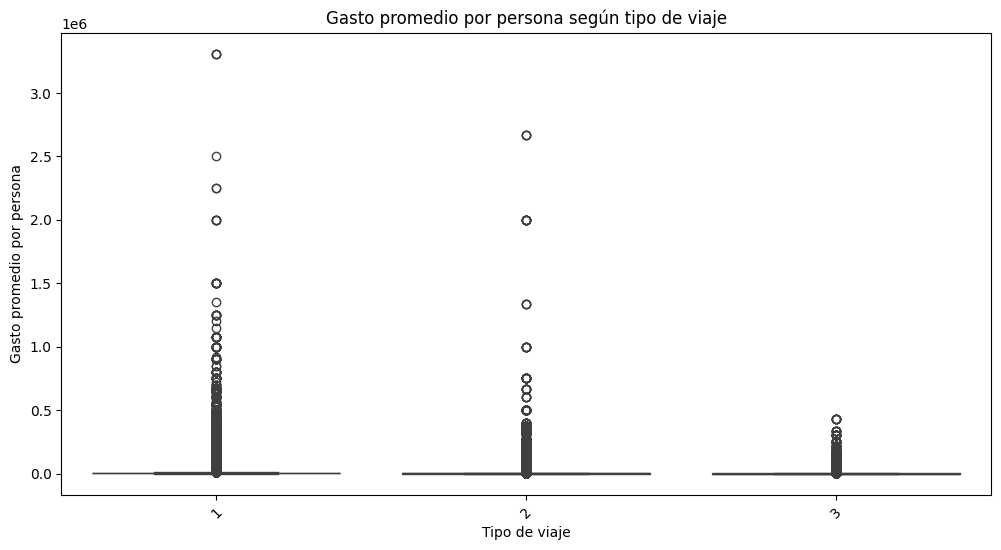

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='px06_agrup', y='gasto_pc')
plt.title('Gasto promedio por persona según tipo de viaje')
plt.xlabel('Tipo de viaje')
plt.ylabel('Gasto promedio por persona')
plt.xticks(rotation=45)
plt.show()

#Gráfico 2: Gasto Promedio segun tipo de viaje.
El gasto promedio por persona varía según el tipo de viaje.
Algunas categorías muestran una mediana y rango de gasto más altos, lo que sugiere que ciertos tipos de viaje requieren mayor inversión.
Los diagramas de caja también permiten identificar valores atípicos, que podrían ser errores o viajes especiales.

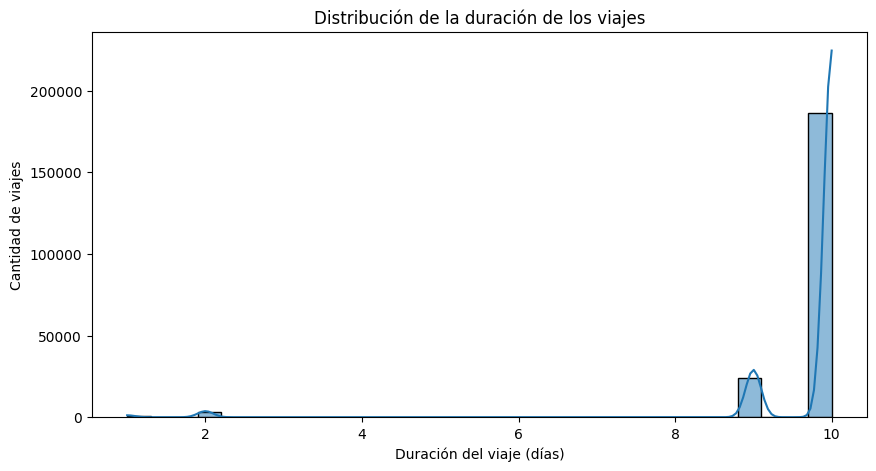

In [59]:
plt.figure(figsize=(10, 5))
sns.histplot(df['px15_1'].dropna(), bins=30, kde=True)
plt.title('Distribución de la duración de los viajes')
plt.xlabel('Duración del viaje (días)')
plt.ylabel('Cantidad de viajes')
plt.show()

#Gráfico 3: Distribución de la duración de los viajes.
La mayoría de los viajes tienen una duración corta, concentrándose en pocos días.
También hay algunos viajes de larga duración, aunque son menos frecuentes.
Este patrón es típico cuando predominan escapadas cortas o viajes de fin de semana.

In [60]:
df['grupo_etario'] = df['j_edad'].replace({
    0: '≤14',
    1: '15–29',
    2: '30–44',
    3: '45–59',
    4: '≥60'
})

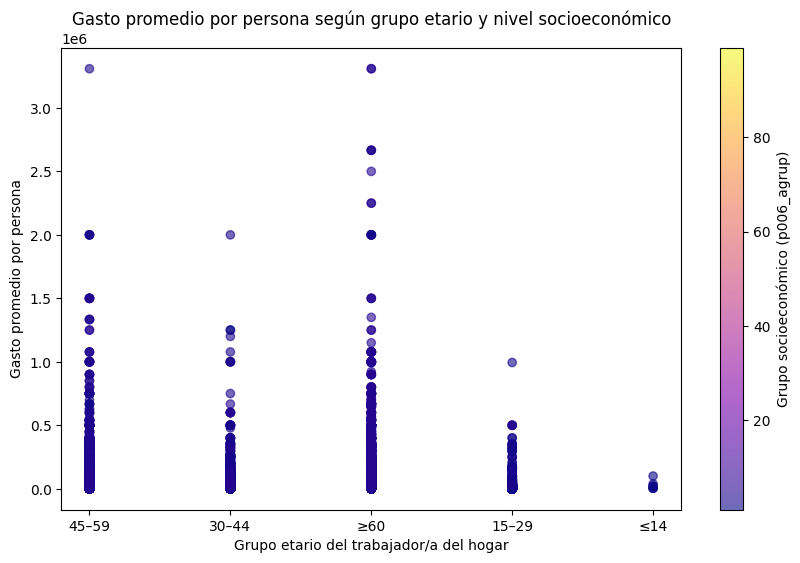

In [61]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['grupo_etario'], df['gasto_pc'], c=df['p006_agrup'], cmap='plasma', alpha=0.6)
plt.colorbar(sc, label='Grupo socioeconómico (p006_agrup)')
plt.title('Gasto promedio por persona según grupo etario y nivel socioeconómico')
plt.xlabel('Grupo etario del trabajador/a del hogar')
plt.ylabel('Gasto promedio por persona')
plt.show()

#Gráfico 4: Gasto por grupo etario y grupo socioeconómico.
El gasto promedio por persona varía tanto por edad como por nivel socioeconómico.
Los grupos de mayor nivel socioeconómico tienden a gastar más, aunque la edad también influye.
No hay una relación lineal clara con la edad, pero sí con el contexto económico.

<Figure size 1200x600 with 0 Axes>

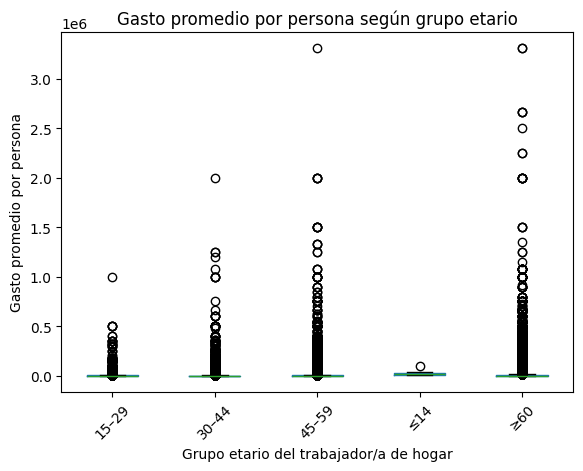

In [62]:
plt.figure(figsize=(12, 6))
df.boxplot(column='gasto_pc', by='grupo_etario', grid=False, rot=45)
plt.title('Gasto promedio por persona según grupo etario')
plt.suptitle('')
plt.xlabel('Grupo etario del trabajador/a de hogar')
plt.ylabel('Gasto promedio por persona')
plt.show()

#Gráfico 5: Gasto promedio según grupo etario.
El gasto promedio varía entre grupos etarios.
Los grupos de mayor edad suelen tener un rango más amplio de gasto, posiblemente por diferencias en ingresos, estilos de vida o tipo de viaje.
Hay valores atípicos en todos los grupos.

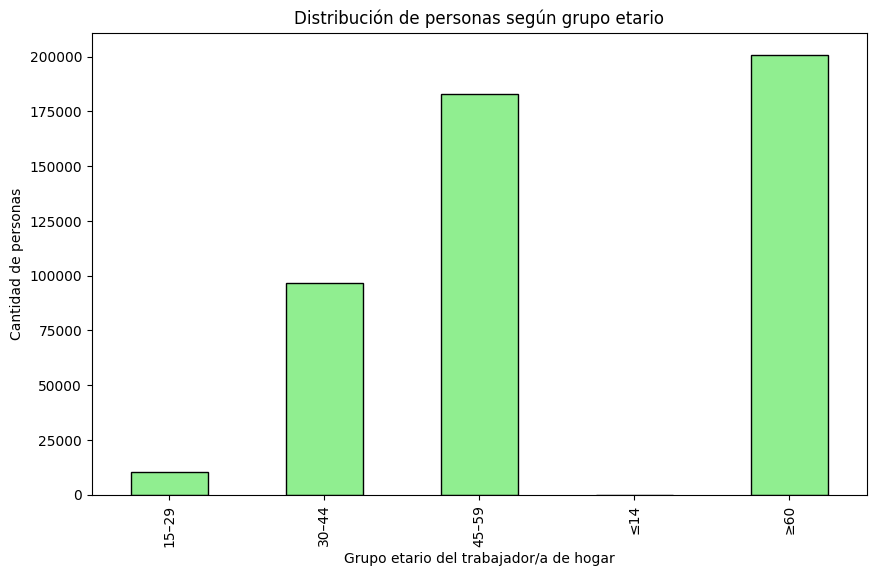

In [63]:
plt.figure(figsize=(10, 6))
df['grupo_etario'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribución de personas según grupo etario')
plt.xlabel('Grupo etario del trabajador/a de hogar')
plt.ylabel('Cantidad de personas')
plt.show()

#Gráfico 6: Distribución de personas por grupo etario
La mayoría de las personas encuestadas pertenecen a los grupos etarios de adultos y adultos mayores.
Los grupos más jóvenes están menos representados, lo cual podría estar relacionado con que el jefe/a de hogar suele ser una persona mayor de edad.

#Objetivo
Analizar qué factores influyen en el gasto por persona (gasto_pc) y crear un modelo que lo prediga.

In [64]:
# Grupo etario
df['grupo_etario'] = df['j_edad'].replace({
    0: '≤14',
    1: '15–29',
    2: '30–44',
    3: '45–59',
    4: '≥60'
})
# Ingreso categórico
ingreso_labels = {
    1: 'Hasta $99.999',
    2: '$100k–199k',
    3: '$200k–299k',
    4: '$300k–399k',
    5: '$400k–499k',
    6: 'Más de $500k'
}
df['ingreso_cat'] = df['quintil_pcf_visitante'].map(ingreso_labels)
# Duración del viaje (asumimos px14 = días de viaje)
df['duracion_viaje'] = df['px14']

In [65]:
#VARIABLES CATEGÓRICAS
categorias = [
    'tipo_visitante', 'region_origen', 'nivel_ed', 'cond_act',
    'region_destino', 'provincia_destino', 'aglomerado_origen',
    'j_sexo', 'j_nivel_ed', 'j_cond_act', 'localidad_destino',
    'grupo_etario', 'ingreso_cat'
]

df_codificado = df.copy()
encoders = {}

for col in categorias:
    encoder = LabelEncoder()
    df_codificado[col + '_codificado'] = encoder.fit_transform(df[col].astype(str))
    encoders[col] = encoder

In [66]:
X = df_codificado[[c + '_codificado' for c in categorias] + ['duracion_viaje']]
y = df_codificado['gasto_pc'].clip(lower=1)
y_log = np.log1p(y)

imputer = SimpleImputer(strategy='mean')
X_imputado = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Mapa de Variables Predictoras

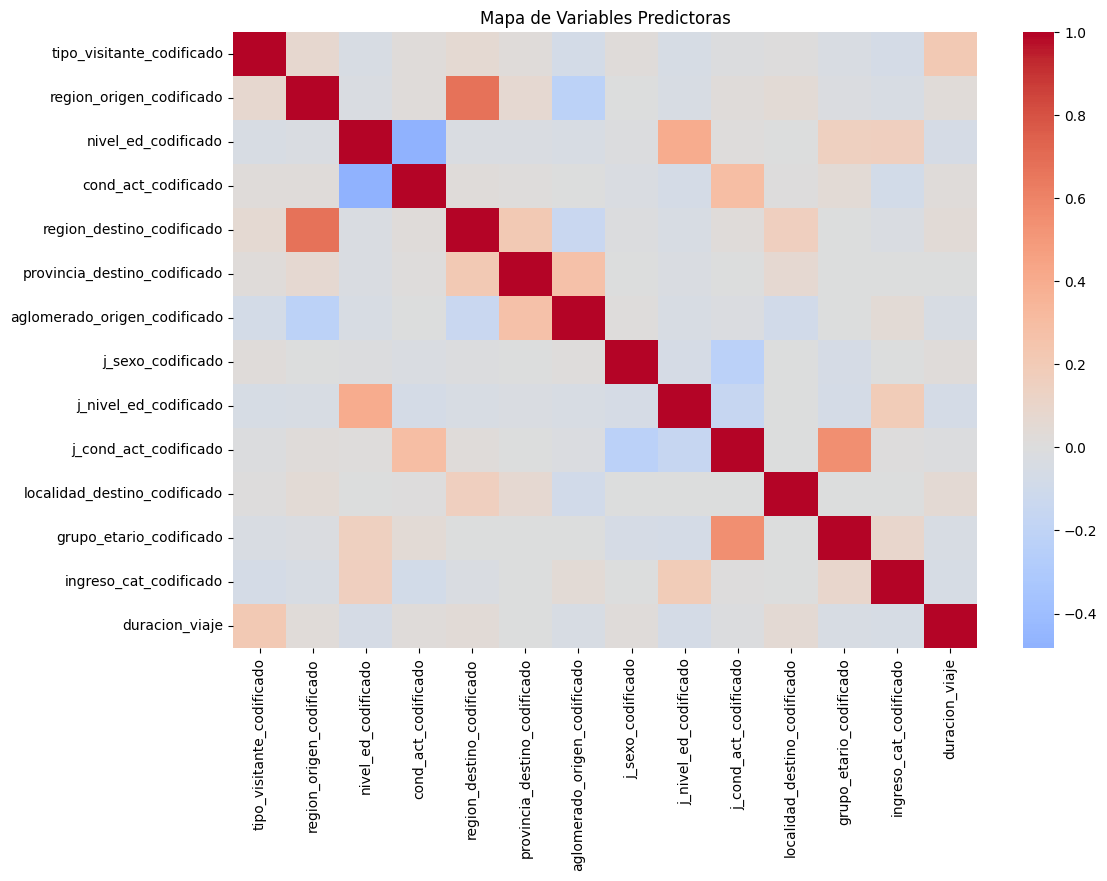

In [67]:
plt.figure(figsize=(12, 8))
corr = X_imputado.corr(method='spearman')
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Variables Predictoras')
plt.show()

In [68]:
# Variables de entrada
X = df_codificado[[c + '_codificado' for c in categorias] + ['duracion_viaje']]
y = df_codificado['gasto_pc']
# Valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputado = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# Mejores variables
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_imputado, y)
# Ranking de variables
scores = pd.DataFrame({
'Variable': X.columns,
'Score F': selector.scores_,
'p-Value': selector.pvalues_
}).sort_values(by='Score F', ascending=False)
print("Ranking de Variables")
print(scores.head(20))
# Filtrado de las mejores
mask = selector.get_support()
variables_seleccionadas = X.columns[mask]
print(f"\nVariables seleccionadas: {list(variables_seleccionadas)}")
X_filtrado = X_imputado[variables_seleccionadas]

Ranking de Variables
                        Variable      Score F        p-Value
0      tipo_visitante_codificado  9951.154334   0.000000e+00
11       grupo_etario_codificado  2256.229481   0.000000e+00
1       region_origen_codificado  1090.034973  8.863788e-239
6   aglomerado_origen_codificado   937.727110  9.665745e-206
9          j_cond_act_codificado   763.005317  8.027391e-168
2            nivel_ed_codificado   616.427383  5.432946e-136
12        ingreso_cat_codificado   553.057856  3.181482e-122
13                duracion_viaje   370.625877   1.467070e-82
8          j_nivel_ed_codificado   364.087819   3.881072e-81
7              j_sexo_codificado   322.303442   4.811435e-72
10  localidad_destino_codificado    77.396072   1.403315e-18
3            cond_act_codificado    35.599332   2.425358e-09
4      region_destino_codificado    33.932184   5.710228e-09
5   provincia_destino_codificado    18.932801   1.354318e-05

Variables seleccionadas: ['tipo_visitante_codificado', 'region_

In [69]:
X = df_filtrado.select_dtypes(include=['int64', 'float64'])
X = X.drop(columns=['gasto_pc'])
y = df_filtrado['gasto_pc']

In [70]:
#TRAIN / TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_imputado, y_log, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [71]:
#MODELO RANDOM FOREST
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
sample_size = min(50000, len(X_train))
X_sample = X_train.sample(sample_size, random_state=42)
y_sample = y_train.sample(sample_size, random_state=42)
random_search = RandomizedSearchCV(
rf, param_distributions=param_grid,
n_iter=20,
cv=2,
scoring='r2',
n_jobs=-1,
verbose=2,
random_state=42
)
random_search.fit(X_sample, y_sample)
best_params = random_search.best_params_
print("\nMejores hiperparámetros encontrados:", best_params)


Fitting 2 folds for each of 20 candidates, totalling 40 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Mejores hiperparámetros encontrados: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}



RESULTADOS DEL MODELO FINAL
MSE: 1,021,830,309.19
RMSE: 31,966.08
MAE: 5,492.06
R²: 0.104
Efectividad aproximada: 10.36%


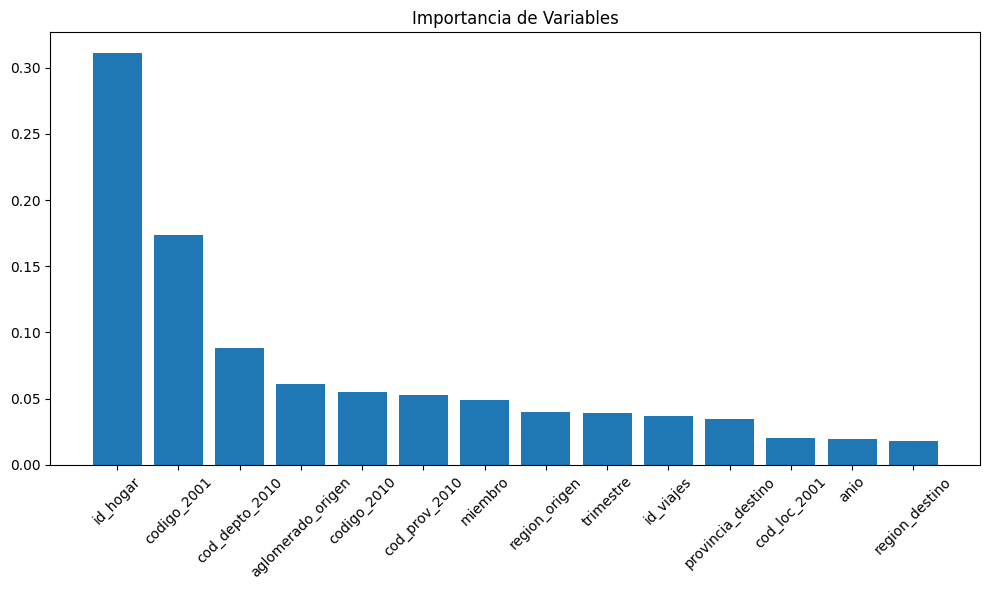

In [72]:
best_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

#Metricas
mse = mean_squared_error(np.expm1(y_test), y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("\nRESULTADOS DEL MODELO FINAL")
print(f"MSE: {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:.3f}")
print(f"Efectividad aproximada: {r2*100:.2f}%")
#Division
importancias = best_model.feature_importances_
indices = np.argsort(importancias)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(indices)), importancias[indices], align='center')
plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=45)
plt.title('Importancia de Variables')
plt.tight_layout()
plt.show()

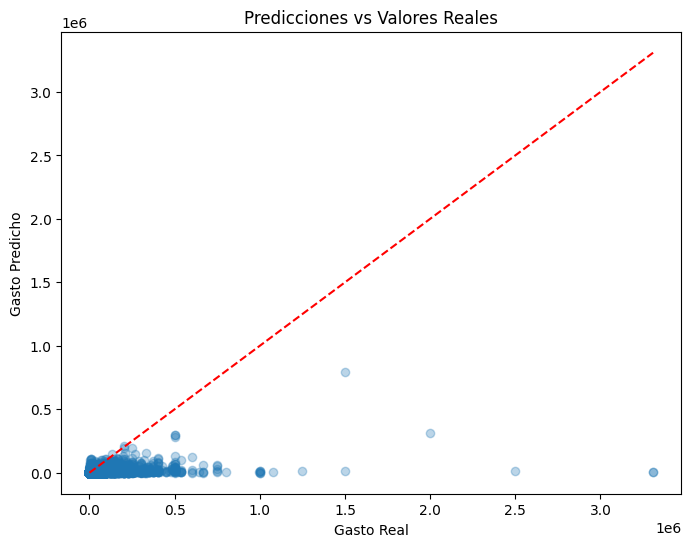

In [73]:
#Describe gasto real vs gasto predicho
plt.figure(figsize=(8,6))
plt.scatter(np.expm1(y_test), y_pred, alpha=0.3)
plt.plot([0, max(np.expm1(y_test))], [0, max(np.expm1(y_test))], 'r--')
plt.xlabel('Gasto Real')
plt.ylabel('Gasto Predicho')
plt.title('Predicciones vs Valores Reales')
plt.show()

# Conclusión final.
El modelo Random Forest entrenado para predecir el gasto por persona obtuvo un R² de 0.10, lo que indica que solo explica aproximadamente el 10% de la variabilidad del gasto. Este bajo valor no significa que el modelo sea ineficaz, sino que refleja la complejidad intrínseca del comportamiento turístico y las limitaciones del dataset disponible.
En primer lugar, el gasto por persona presenta una alta variabilidad y múltiples valores extremos. Algunos viajes de lujo o registros atípicos generan outliers que dificultan que los árboles del Random Forest capturen patrones consistentes. Incluso con técnicas de filtrado y transformación logarítmica, estos valores extremos siguen afectando la capacidad predictiva.
En segundo lugar, las variables utilizadas como predictores son insuficientes para explicar completamente el gasto.
En conclusión, el R² bajo refleja la complejidad y el ruido del comportamiento turístico, así como la necesidad de incluir variables adicionales para mejorar la predicción. Sin embargo, el Random Forest sigue proporcionando información valiosa para entender patrones generales, segmentar clientes y optimizar recursos, lo que lo convierte en una herramienta útil para la planificación estratégica en el sector turístico